Introduction
bla bla The data set given is banking

In [4]:
import pandas as pd

We start by importing pandas, a library to easier shape the data in the csv file.

In [24]:
df = pd.read_csv("../../dataExam/banking.csv")
print(df)

print(df.columns.tolist())

       age           job marital-status  education default  balance housing  \
0       58    management        married   tertiary      no     2143     yes   
1       44    technician         single  secondary      no       29     yes   
2       33  entrepreneur        married  secondary      no        2     yes   
3       47   blue-collar        married        NaN      no     1506     yes   
4       33       unknown         single    unknown      no        1      no   
...    ...           ...            ...        ...     ...      ...     ...   
45206   51    technician        married   tertiary      no      825      no   
45207   71       retired       divorced    primary      no     1729      no   
45208   72       retired        married  secondary      no     5715      no   
45209   57   blue-collar        married  secondary      no      668      no   
45210   37  entrepreneur        married  secondary      no     2971      no   

      loan    contact  day month  duration  campaig

Printing the dataset gives an idea what the dataset contains and their column names. The dataset seems like it's not missing much clean up, so we'll clean up as we explore instead.

Exploration
In the exploration phase we'll focus on ... bla bla

In [ ]:
count = df['contact'].value_counts()
print(count, "\n")

count2 = df['previous'].value_counts()
print(count2, "\n")

count3 = df['previous-campaign-result'].value_counts()
print(count3, "\n")

count4 = df['marketing-result'].value_counts()
print(count4)



contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64 



KeyError: 'previous'

These four columns looks different than the other columns at a glance. At this point "previous" seems odd, as it's hard to determine what it corrolates with or what it refers to. 

In [ ]:
print(df.groupby(['previous', 'marketing-result']).size().unstack(fill_value=0.0))

marketing-result  failure  success
previous                          
0.0               32570.0   3288.0
1.0                2120.0    560.0
2.0                1599.0    446.0
3.0                 824.0    290.0
4.0                 530.0    167.0
5.0                 330.0    118.0
6.0                 187.0     79.0
7.0                 144.0     53.0
8.0                  87.0     39.0
9.0                  67.0     24.0
10.0                 39.0     26.0
11.0                 50.0     14.0
12.0                 32.0     10.0
13.0                 29.0      9.0
14.0                 14.0      4.0
15.0                 18.0      1.0
16.0                 13.0      0.0
17.0                 11.0      3.0
18.0                  6.0      0.0
19.0                  9.0      2.0
20.0                  7.0      1.0
21.0                  3.0      1.0
22.0                  4.0      1.0
23.0                  6.0      1.0
24.0                  5.0      0.0
25.0                  4.0      0.0
26.0                

It seems like the column 'previous' could be corrolating with the column 'marketing_results'. There seems to be a bigger success rate if the "previous" is between 3-10. This could perhaps indicate 'previous' is the amount of times a client was contacted before they successfully accepted the banks (marketing) offer. Let's rename the column to a more nuanced name which reflects what it is better, lets call it previous-campaign. We also filled the missing NaN values with 0.0, to uniform it and overall, the NaN data wasn't needed anyway.

In [26]:
df = df.rename(columns={'previous': 'previous-campaign'})
print(df.columns.tolist())

['age', 'job', 'marital-status', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'days-since-last-contact', 'previous-campaign', 'previous-campaign-result', 'marketing-result']


Percentiles of 'previous-campaign':
count    43872.000000
mean         0.503373
std          1.343048
min          0.000000
50%          0.000000
90%          2.000000
95%          3.000000
99%          7.000000
max          7.000000
Name: previous-campaign, dtype: float64


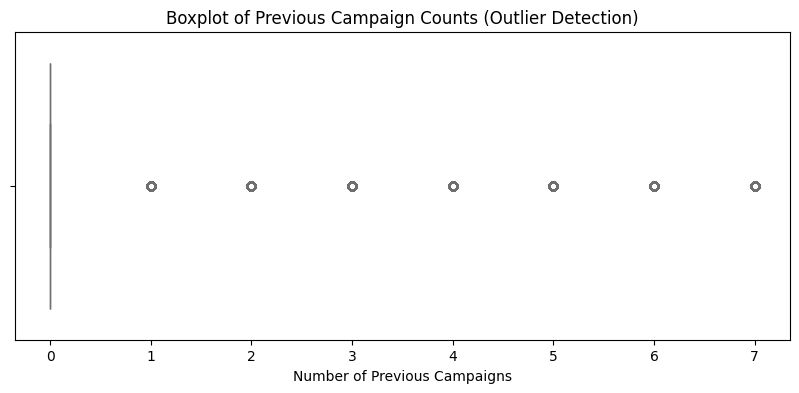

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Percentiles of 'previous-campaign':")
print(df['previous-campaign'].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

df['previous-campaign'] = df['previous-campaign'].clip(upper=7)

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['previous-campaign'], color='skyblue')
plt.title('Boxplot of Previous Campaign Counts (Outlier Detection)')
plt.xlabel('Number of Previous Campaigns')
plt.show()

'previous-campaign' had some outliers, we clean it up by capping the value at 7 since 99% (as seen in the print statement) of the values are equal to or lower than 7.

marketing-result           failure   success
previous-campaign-result                    
failure                   0.873903  0.126097
other                     0.833152  0.166848
success                   0.352747  0.647253
unknown                   0.908385  0.091615 
 

marketing-result                             failure   success
previous-campaign previous-campaign-result                    
0.0               unknown                   0.908305  0.091695
1.0               failure                   0.889429  0.110571
                  other                     0.846690  0.153310
                  success                   0.370370  0.629630
2.0               failure                   0.877458  0.122542
                  other                     0.828042  0.171958
                  success                   0.364431  0.635569
                  unknown                   0.500000  0.500000
3.0               failure                   0.848910  0.151090
                  other          

C:\Users\jonas\AppData\Local\Temp\ipykernel_28116\1044369503.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rates.index, y=success_rates.values, palette='viridis')


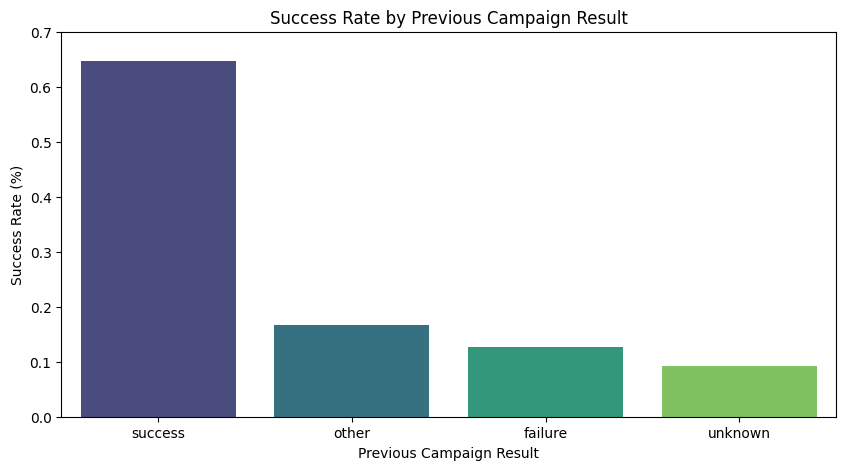

In [66]:
results = df.groupby('previous-campaign-result')['marketing-result'].value_counts(normalize=True).unstack()
print(results, "\n \n")

results2 = df.groupby(['previous-campaign', 'previous-campaign-result'])['marketing-result'].value_counts(normalize=True).unstack()
results3 = results2.dropna()
print(results3)

# seaborn
# calculate it
success_rates = df.groupby('previous-campaign-result')['marketing-result'] \
                  .value_counts(normalize=True) \
                  .unstack()['success'] \
                  .sort_values(ascending=False)
# show plit
plt.figure(figsize=(10, 5))
sns.barplot(x=success_rates.index, y=success_rates.values, palette='viridis')
plt.title('Success Rate by Previous Campaign Result')
plt.xlabel('Previous Campaign Result')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 0.7)
plt.show()

When we group previous-campaign-result and marketing-result, we see how past (marketing) successes are more likely to convert again. Likewise, those who were marketing campaigned towards who failed have a low success rate. This shows how the specific clients who are already susceptible to the campaigns respond well to the marketing again.

The success of the clients responding well (if prior marketing campaigns were successfull on them) is more noticable when we group "previous-campaign", "previous-campaign-result" and "marketing-result".

Overall the data indicates that even just 1 prior campaign improves the outcome of a success.

(Note: how old are these people who like the marketing, are they retired? whats going on with these people who like marketing better if they were campaigned towards successfully already.)

In [61]:
print(df['default'].value_counts(dropna=False))

default
no     44396
yes      815
Name: count, dtype: int64


Let's investigate the column 'default' more to see what it is and what it does. It most likely isn't about marketing, let's try others.

loan           no       yes
default                    
no       0.843612  0.156388
yes      0.630675  0.369325


C:\Users\jonas\AppData\Local\Temp\ipykernel_28116\355911184.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='balance', data=df, palette='Set2')


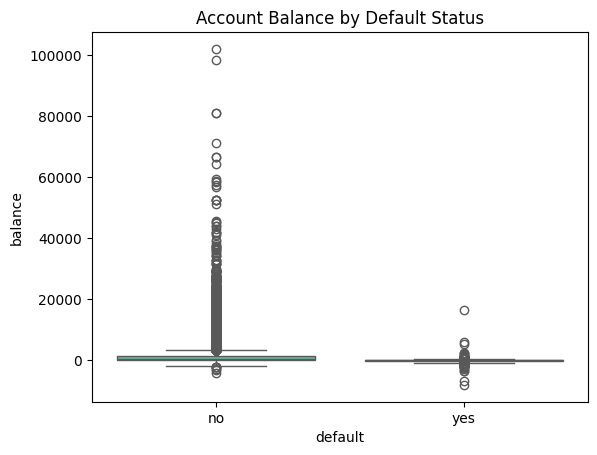

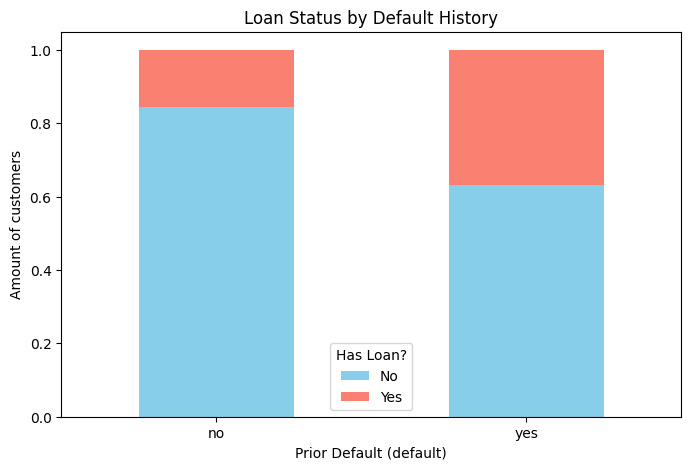

In [65]:
# with loan
print(pd.crosstab(df['default'], df['loan'], normalize='index'))

# with balance
sns.boxplot(x='default', y='balance', data=df, palette='Set2')
plt.title('Account Balance by Default Status')
plt.show()

# bar plot
pd.crosstab(df['default'], df['loan'], normalize='index').plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 5))
plt.title('Loan Status by Default History')
plt.xlabel('Prior Default (default)')
plt.ylabel('Amount of customers')
plt.legend(title='Has Loan?', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

The data shows the proportion of how the clients with a default have a higher tendency to have loans. This would probably indicate for the bank that they should be more hesitant to give those with a default a loan (as they both have a low balanced bank account, and bigger chance of taking loans, i.e they could be worse payers (bigger headaches) for the bank.).

(Note who are these people? jobs, age, etc..)